Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.


**Мягкий дедлайн:** 6 ноября 23:59

**Жесткий дедлайн:** 13 ноября 23:59

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import HTML

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [0]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [0]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [0]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [0]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head(10)

<bound method NDFrame.head of              Survived  Pclass  ...            Cabin Embarked
PassengerId                    ...                          
259                 1       1  ...              NaN        C
680                 1       1  ...      B51 B53 B55        C
738                 1       1  ...             B101        C
312                 1       1  ...  B57 B59 B63 B66        C
743                 1       1  ...  B57 B59 B63 B66        C
119                 0       1  ...          B58 B60        C
300                 1       1  ...          B58 B60        C
381                 1       1  ...              NaN        C
558                 0       1  ...              NaN        C
701                 1       1  ...          C62 C64        C
717                 1       1  ...              C45        C
378                 0       1  ...              C82        C

[12 rows x 11 columns]>

**Пример создания признака.**

In [0]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [0]:
age_categories = [age_category(age) for age in data.Age]

In [0]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [44]:
data['Age_category'] = data['Age'].apply(age_category)


NameError: ignored

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [0]:
a=len(data[data['Sex']=="male"].index)
b=len(data[data['Sex']=="female"].index)
print("На борту находилось",a,"мужчин и",b,"женщин")

На борту находилось 577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

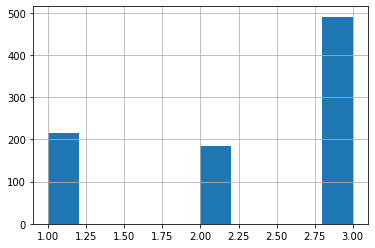

In [0]:
# распределение переменной Pclass
data['Pclass'].hist()

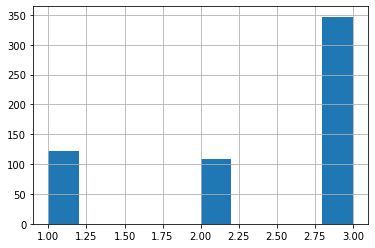

In [0]:
#распределение переменной Pclass для мужчин
datamale=data[data['Sex']=="male"]
datamale['Pclass'].hist()

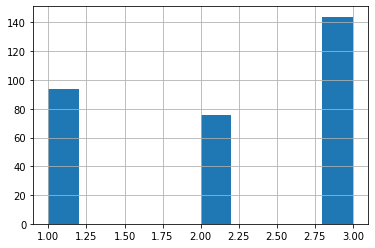

In [0]:
#распределение переменной Pclass для женщин
datafemale=data[data['Sex']=="female"]
datafemale['Pclass'].hist()

In [0]:
print("мужчин 2-го класса = ",len(data[(data['Sex']=="male")&(data['Pclass']==2)].index))

мужчин 2-го класса =  108


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [0]:
aa=data['Fare'].median()
bb=data['Fare'].std()
print("Медиана -",round(aa,2),", cтандартное отклонение -",round(bb,2))

Медиана - 14.45 , cтандартное отклонение - 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [0]:
q1=len(data[(data['Age'] <30) & (data.Survived == 1)].index)
q2=len(data[(data['Age'] <30)].index)
q3=q1/q2*100
qq1=len(data[(data['Age'] >60) & (data['Survived'] == 1)].index)
qq2=len(data[(data['Age'] >60)].index)
qq3=qq1/qq2*100
print("Доля выживших в обеих группах:",round(q3,1),'% среди молодых и',round(qq3,1),'% среди старых')
q=len(data['Age'].index)

print("Выживших людей моложе 30 лет относительно общего кол-ва пассажиров:", round(q1/q*100,1),"%\nВыживших людей старше 60 лет относительно общего кол-ва пассажиров:",round(qq1/q*100,1),'%')
if q1/q*100 >qq1/q*100: print("Люди моложе 30 лет выживали чаще, чем люди старше 60 лет")
else:print("Люди старше 60 лет выживали чаще, чем люди моложе 30 лет") 

Доля выживших в обеих группах: 40.6 % среди молодых и 22.7 % среди старых
Выживших людей моложе 30 лет относительно общего кол-ва пассажиров: 17.5 %
Выживших людей старше 60 лет относительно общего кол-ва пассажиров: 0.6 %
Люди моложе 30 лет выживали чаще, чем люди старше 60 лет


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [0]:
q1=len(data[(data['Sex'] =="male") & (data.Survived == 1)].index)
q2=len(data[(data['Sex'] =="male")].index)
q3=q1/q2*100
qq1=len(data[(data['Sex'] =="female") & (data['Survived'] == 1)].index)
qq2=len(data[(data['Sex'] =="female")].index)
qq3=qq1/qq2*100
print("Доля выживших в обеих группах:",round(q3,1),'% среди мужчин и',round(qq3,1),'% среди женщин')
q=len(data['Sex'].index)

print("Выживших мужчин относительно общего кол-ва пассажиров:", round(q1/q*100,1),"%\nВыживших женщин относительно общего кол-ва пассажиров:",round(qq1/q*100,1),'%')
if q1/q*100 >qq1/q*100: print("Мужчины выживали чаще, чем женщины")
else:print("Женщины выживали чаще, чем мужчины") 


Доля выживших в обеих группах: 18.9 % среди мужчин и 74.2 % среди женщин
Выживших мужчин относительно общего кол-ва пассажиров: 12.2 %
Выживших женщин относительно общего кол-ва пассажиров: 26.2 %
Женщины выживали чаще, чем мужчины


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [9]:
aa=0
l=[]
o=0
b=''
datamal=data[(data['Sex']=='male')]

for i in datamal['Name']:
    a=i.split()
    l.append(a[2])
    o+=1
for x in l:
    q=l.count(x)
    if q>aa:
        aa=l.count(x)
        b=x
print ("Cамое популярное имя среди пассажиров Титаника мужского пола -",b)

Cамое популярное имя среди пассажиров Титаника мужского пола - William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AttributeError: ignored

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [0]:
# Ваш код здесь